# Наложение шума

In [2]:
import numpy as np
import cv2

Было принято реализовать функцию генерации цветного и серого Гауссовского шума.

Сам шум генерируется по формуле плотности вероятности Гауссовского шума:

$$f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp{(-\frac{(x-\mu)^2}{2\sigma^2})}$$

где 
- $x$ - случайная величина (интенсивность пикселя в нашем случае),
- $\mu$ - математическое ожидание распределения (центр шума),
- $\sigma$ - среднеквадратическое отклонение (величина шума)

In [94]:
def gaussian_noise(image: np.ndarray, mean: float = 0, sigma: float = 1, grayscale: bool = False) -> np.ndarray:
    if grayscale:
        noise = np.random.normal(mean, sigma, (image.shape[0], image.shape[1])).astype(np.int16)
        noise = np.stack([noise] * 3, axis=-1)
    else:
        noise = np.random.normal(mean, sigma, image.shape).astype(np.int16)

    noisy_image = image.astype(np.int16) + noise

    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

In [147]:
from pathlib import Path

images_path = '../images/'

noisy_images_path = '../noisy_images/'
noisy_images_path = Path(noisy_images_path).absolute()
Path.mkdir(noisy_images_path)

Изображение случайным образом подвергается воздействию шума (с вероятностью 50%).

Принятое мат.ожидание - 0, принятое среднеквадратическое отклонение - 100.

In [148]:
import re

images_path = Path(images_path)
for i in images_path.iterdir():
    image_path = i.absolute()
    image_id = re.search('images/(.*)', str(image_path)).group(1)
    image = cv2.imread(image_path, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    should_noisify = np.random.choice([0, 1])
    if should_noisify:
        noisy_image = gaussian_noise(image, 0, 100, True)
        cv2.imwrite(str(Path.joinpath(noisy_images_path, image_id)), noisy_image)

Смотрим на полученные результаты:

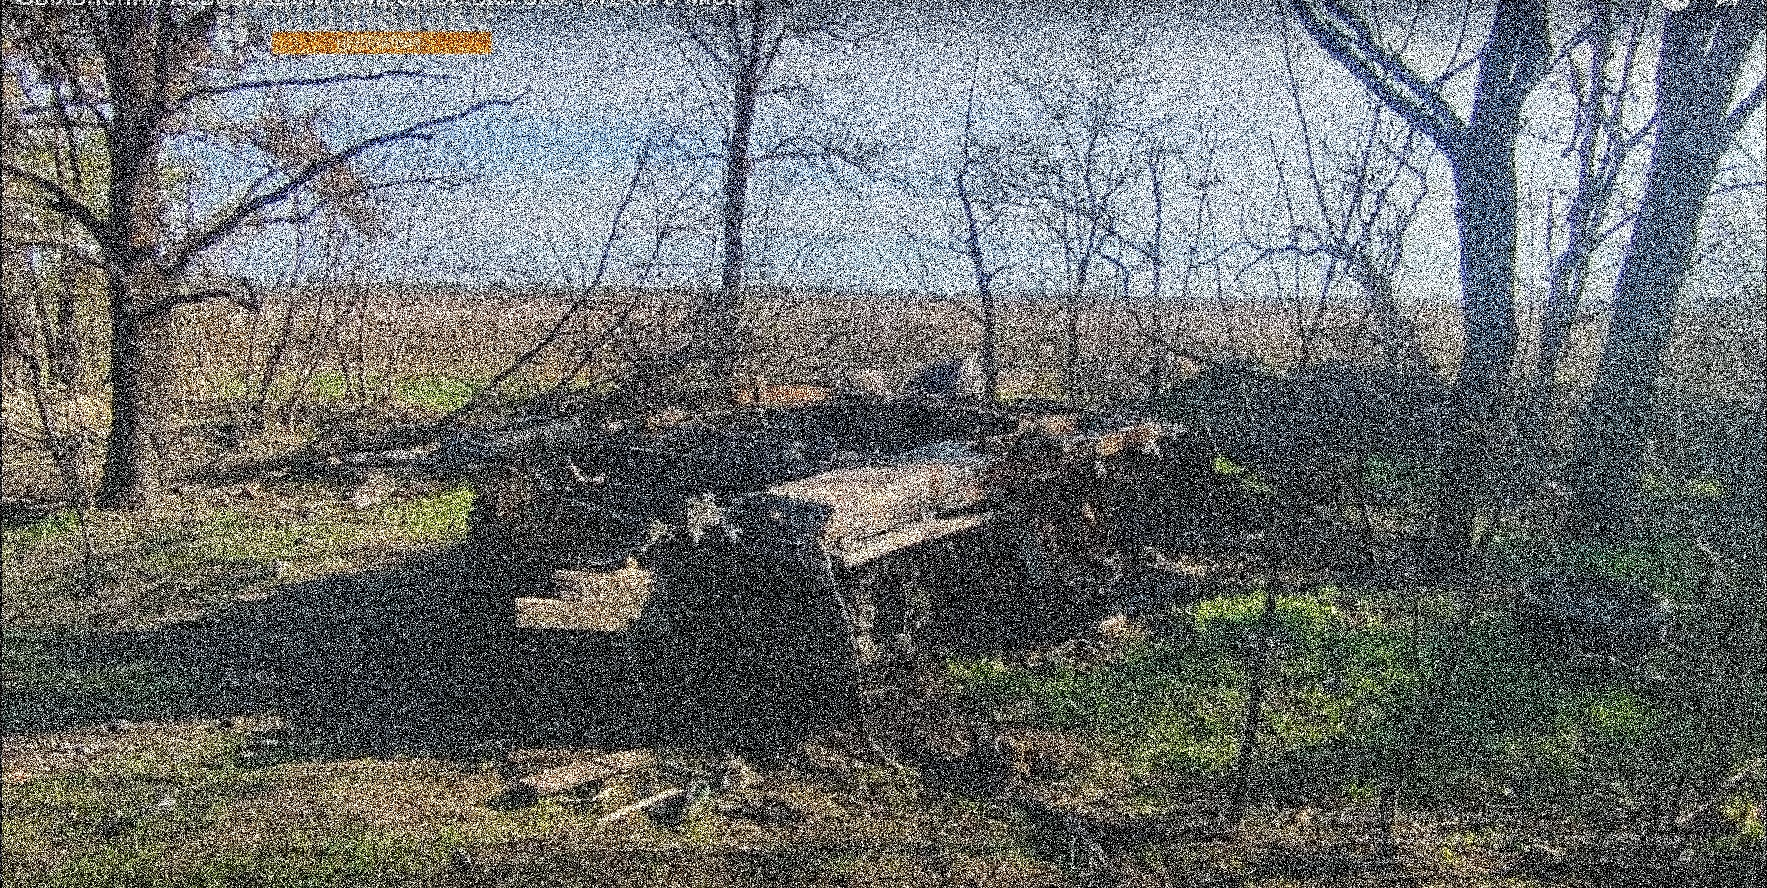

In [153]:
from PIL import Image
from IPython.display import display

random_image_path = np.random.choice(list(noisy_images_path.iterdir()))
random_image = cv2.imread(random_image_path, 1)
display(Image.fromarray(random_image))